---
title: Week 1 - Loading, plotting & analyzing GRACE and GRACE-FO mascon data
subtitle: Get familiar with the GRACE and GRACE-FO data set 
authors:
  - name: Katrin Bentel (katrin.bentel@ethz.ch)
---

:::{important} Learning Goals &#9971;
- [ ] I can load the netCDF file of GRACE and GRACE-FO mascons into my JupyterNotebook and work with the individual variables
- [ ] I can manipulate and plot the variables, e.g. using a suitable map projection for the geographical data
- [ ] I can differentiate between the resolution of the data and the grid spacing and explain the reasons for the resolution of the data
- [ ] I can apply the land-ocean mask and work with the selected data (for now, plot the selected data)
- [ ] I can select elements of the data, e.g. specific regions and visualize them
- [ ] I can visualize the gaps in the time series and explain their origin
:::

:::{hint} About Jupyter Notebooks &#9756;
:class: dropdown
If you are not familiar with working in **Jupyter Notebook**, here are three basic things to know about:
1. Each Notebook is strucutred into **cells**. A cell is either
    - **text** formatted in [Markdown](https://mystmd.org/guide/typography),
    - **code** to execute or just
    - **raw content**.
_(The type of each cell can be individually asigned in the menu bar.)_
1. You can double-click on each cell to see its source. If you hit `Shift + Enter` or click &#9658; in the menu bar, the selected cell will be **executed**. - _Try it out right now with this cell!_
1. To create a new cell below you current cell click 'b', to create one above use 'a'. The current cell has to be selected but not in edit mode

:::

:::{attention} Questions
Don't hesitate to ask any question that might be coming up. If you think your question could be relevant to others as well, please post it in the [**Moodle forum**](https://moodle-app2.let.ethz.ch/mod/forum/view.php?id=1187440). Or you can just contact me by email.

____

## Table of Contents
#### [](#h-mascons)

#### [](#h-plot-mascons)

#### [](#h-plot-region)

#### [](#h-plot-time-series)

#### [](#h-outlook-feedback)


_____

(h-mascons)=
# 1. GRACE mass concentration (mascon) solutions

:::{tip} _Exercise 1:_ Write down the most important points about mascon solutions
Visit the [**NASA-JPL webpage**](https://grace.jpl.nasa.gov/data/get-data/jpl_global_mascons/) and look for information about mascon solutions. We are working with the JPL RL06.3_v04 mascon solution from GRACE and GRACE-FO with the coastline resolution improvement (CRI) filter applied. Note down all the information about this solution that seems relevant to you and let the following questions guide you.
- _Why are we talking about "solutions"?_
- _What are the advantages of this solution?_
- _What's the actual resolution of the data?_
- _Why is the CRI filter needed? And what does it basically do?_
- _What's the length of the time series?_


:::

#### Why are we talking about solutions?
Because the Mascon model provides the monthly solution of the measurements of grace and the corresponding parameter estimation for the spherical harmonics which was smoothed through the filter kernel and afterwards classified in the equal size pixel grid pixels...

#### What are the advantages?
With mascons, we can implement geophysical constraints much easier. These a priori constraints help to filter out noise from the GRACE/GRACE-FO observations at the Level-2 processing step, which is a much more rigorous approach than the empirical post-processing filtering applied to land and ocean grids derived from spherical harmonics.


#### What's the actual resolution of the data
The underlying data source is 3°x3° but it was artificially improved to 0.5°x0.5° to be able to display the CRI...


#### Why is the CRI filter needed? What does it basically do?
At the coastlines one is interested in splitting the land part from the sea part to ahve a better feeling for the geoid and the hydrology processess at coastal regions.


#### Whats the length of the time series?
The GRACE mission collected data from April 2002 to October 2017, and the GRACE Follow-On mission has been providing data since May 2018. The JPL RL06M Mascon solution offers monthly mass grids, with anomalies reported relative to the 2004.0-2009.999 time-mean baseline




:::{tip} _Exercise 2:_ Load the GRACE and GRACE-FO mascon data into your JupyterNotebook
Follow the steps below to load the mascon data set from the GRACE and GRACE-FO missions.
:::

#### &#128187; Setup code environment


The following code cell loads the needed Python libraries into the environment. They have to be executed with `Shift + Enter` (or &#9658;) every time you start the Notebook.


In [13]:
# reads the .nc and .nc4 files
import netCDF4 as nc 
# miscellaneous operating system interfaces
import os

# visualizes the data
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

#processes the data
import numpy as np 
import pandas as pd

# helps visualize the data
import cartopy.crs as ccrs 
from cartopy.mpl.geoaxes import GeoAxes

# handles dates and times
from datetime import datetime 

&#9989; Info:
: The latest GRACE mascon solution has previously been downloaded from <https://podaac.jpl.nasa.gov/> and uploaded into your JupyterHub workspace in the 'data' folder when you copied this JupyterNotebook. You can download data yourself if you create an *Earth Access* account.

:::{hint} General file structure of NetCDF: &#9756;
A NetCDF file has three basic parts: metadata, dimensions and variables. Variables contain both metadata and data.



#### &#128187; Load the NetCDF data file into the variable 'mascons' and access data as well as metadata

In [14]:
# LOAD DATA
file_path = './../data/GRCTellus.JPL.200204_202411.GLO.RL06.3M.MSCNv04CRI.nc'

# Check if the file exists
if os.path.exists(file_path):
    mascons = nc.Dataset(file_path)
else:
    raise FileNotFoundError(f"File not found: {file_path}")

# short alternative, without checking the file path:
# mascons = nc.Dataset('./../data/GRCTellus.JPL.200204_202411.GLO.RL06.3M.MSCNv04CRI.nc')


# ACCESS METADATA

# Printing the dataset, mascons, gives us information about the data contained in the file.

mascons   # same as print(mascons)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention-1.6
    title: JPL GRACE and GRACE-FO MASCON RL06.3Mv04 CRI
    summary: Monthly gravity solutions from GRACE and GRACE-FO as determined from the JPL RL06.3Mv04 mascon solution - with CRI filter applied
    keywords: Solid Earth, Geodetics/Gravity, Gravity, liquid_water_equivalent_thickness
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    platform: GRACE and GRACE-FO
    institution: NASA/JPL
    creator_name: David Wiese
    creator_email: grace@podaac.jpl.nasa.gov
    creator_url: https://grace.jpl.nasa.gov
    creator_type: group
    creator_institution: NASA/JPL
    publisher_name: Physical Oceanography Distributed Active Archive Center
    publisher_email: podaac@jpl.nasa.gov


:::{tip} _Exercise 3:_ Check out the variables
Check out all variables in the data set and make sure you understand what they contain and their dimension. You may list them here for your reference, as we will keep working with this data set and it is important to know what we are looking at and it might be helpful for you to come back to this list later on.
:::


#### &#128187; Here are some code snippet examples to check out the data and metadata

In [15]:
# access to dimensions of data by loopring though all available dimensions

for dim in mascons.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 720
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 360
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 239
<class 'netCDF4._netCDF4.Dimension'>: name = 'bounds', size = 2


In [16]:
# access variable metadata in the same way as dimensions

for var in mascons.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    units: degrees_east
    long_name: longitude
    standard_name: longitude
    axis: X
    valid_min: 0.25
    valid_max: 359.75
    bounds: lon_bounds
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    units: degrees_north
    long_name: latitude
    standard_name: latitude
    axis: Y
    valid_min: -89.75
    valid_max: 89.75
    bounds: lat_bounds
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 2002-01-01T00:00:00Z
    long_name: time
    standard_name: time
    axis: T
    calendar: gregorian
    bounds: time_bounds
unlimited dimensions: 
current shape = (239,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lwe_thickness(tim

In [17]:
# These examples might be useful to look at individual variables, but just use as code snippet examples to answer exercise 3 and for your further data handling. 
# All three print statements in a row might not make much sense.


# access information about a specific variable:
print(mascons['lat'])


# get an overview of all variables included
print(mascons.variables.keys())


# get dimensions of a variable
print(mascons['land_mask'].shape)

print(mascons['lwe_thickness'])

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    units: degrees_north
    long_name: latitude
    standard_name: latitude
    axis: Y
    valid_min: -89.75
    valid_max: 89.75
    bounds: lat_bounds
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['lon', 'lat', 'time', 'lwe_thickness', 'uncertainty', 'lat_bounds', 'lon_bounds', 'time_bounds', 'land_mask', 'scale_factor', 'mascon_ID', 'GAD'])
(360, 720)
<class 'netCDF4._netCDF4.Variable'>
float64 lwe_thickness(time, lat, lon)
    _FillValue: -99999.0
    units: cm
    long_name: Liquid_Water_Equivalent_Thickness
    standard_name: Liquid_Water_Equivalent_Thickness
    coordinates: time lat lon
    grid_mapping: WGS84
    valid_min: -2144.969478675216
    valid_max: 1031.8367877283858
    comment: Coastline Resolution Improvement (CRI) filter is applied
unlimited dimensions: 
current shape = (239, 360, 720)
filling on


:::{tip} _Exercise 4:_ What is 'lwe_thickness'?
This is important to understand the data, thus, please find out and explain the units.
:::


LWE_Thickness is the liquid water equivalent of the gravitational anomaly. It is the thickness of water that would be required to produce the same gravitational anomaly.

_____

(h-plot-mascons)=
# 2. Plot a single month snapshot into a map projection


:::{tip} _Exercise 5:_ Create a geographical plot with map projection
Create a map plot for one single month of the data. The actual choice of month and projection is up to you, but the final result should look somewhat similar to the plot below. You can work with Jupyternaut (see hints below) or your chatbot platform of choice to refine and tweak your plot.
What do you think you see in this plot? First guesses are great and we will discuss this further together.


&#9989; Map plot:
: You will need the map plotting again (several times) as we proceed with the course. Therefore it is important that you understand your code, know (and document for yourself) where to tweak which parameter (e.g. adjust the colorscale, ...) and are able to revisit and reuse it.

:::

![March 2014](./images/map_plot.png)



:::{hint} About Jupyternaut and using generative AI &#9756;
:class: dropdown
Jupyternaut is the **chat interface** of [**Jupyter AI**](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#the-chat-interface). It can be found in the side panel on the left in the lowest tab with the chat symbol. Jupyternaut is a human-AI interface which allows you to interact with a LLM. You can choose the LLM of your coice in the settings, or you can use our configuration with OpenAI's gpt4o. To set this configuration, just execute the setup_jupyternaut.pyc file by pasting the following command into a code cell of your notebook: `!python3 setup_jupyternaut.pyc`




Jupyternaut or any other chatbot can help you to understand code, to comment code, to improve code and  to write code. However, keep the risks and limitations for using generative AI in mind:
- **bias & ethical issues** – AI can inherit and amplify biases from training data
- **incorrect or inefficient code** – AI may generate syntactically correct but logically flawed or inefficient code. Always review and test outputs.
- **security vulnerabilities** – AI-generated code might introduce security flaws (e.g., improper authentication handling, ...).
- **lack of context awareness** – it doesn’t fully understand project-specific constraints, architecture, or long-term maintainability.
- **outdated or incomplete knowledge** – it may suggest deprecated libraries, outdated syntax, or solutions that don't align with best practices.
- **over-reliance & reduced learning** – depending too much on AI can hinder critical thinking and debugging skills. It's important to understand the code, not just copy it.
- **limited debugging ability** – AI can assist with debugging but may misinterpret error messages or suggest fixes that don’t work.

**Prompting**
_Efficient prompting is and will be a key skill on the labour market._
Efficient prompting is
- **specific** you need to have a very clear unterstanding of your needs so that you can communicate these clearly to the AI. Also be very clear about the context of your request.
-  **iterative and interactive** clarify and refine your prompts to get to more relevant and detailed answers
-  **discrete** split complex coding tasks into small sub-tasks. You need to have a good understanding of coding and the code structure to get to your desired resulst step by step and with subtasks/-functions



**Best practices** for using generative AI in coding effectively and responsibly:
- always review & test the code: AI-generated code may look correct but can have logic errors or inefficiencies.
    Run the code, test edge cases, and validate against requirements.
- use AI as an assistant, not a replacement: Treat AI as a tool to accelerate learning, not a substitute for understanding. Read and modify AI-generated code instead of just copying it.
- learn to debug AI-generated code: AI may misinterpret error messages or suggest ineffective fixes. Debug and improve AI-generated code instead of blindly trusting it.
- develop critical thinking: Question AI suggestions, e.g.: Why does this code work? Is there a more efficient way to solve the problem? What happens in edge cases?

By following these best practices, our goal is to leverage AI as a helpful assistant while still developing strong programming skills.
:::




The date which is closest to 2012-12-01 is 2012-11-18 12:00:00


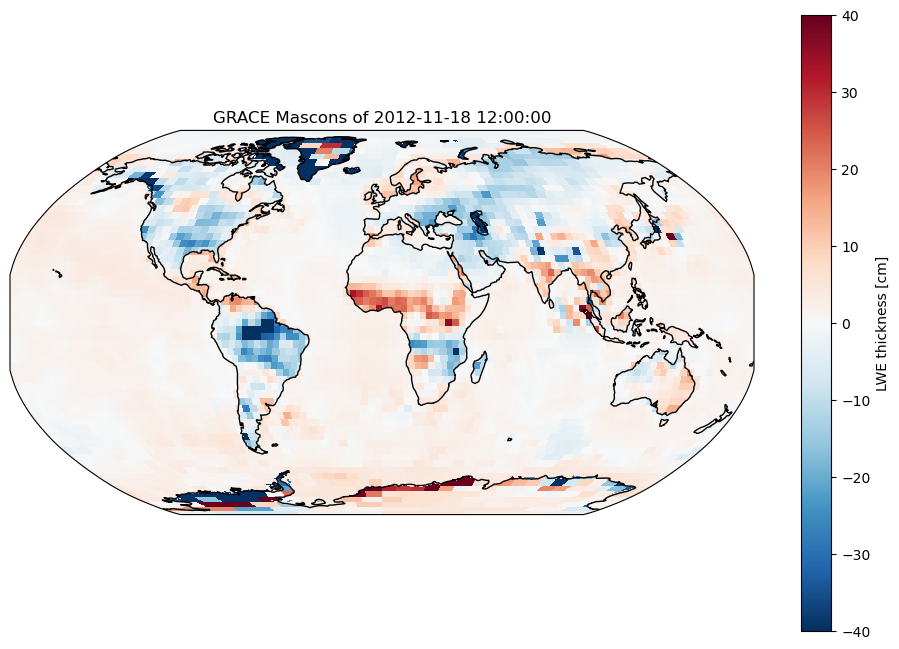

In [18]:
def plot_mascon_map(data, date_of_dataset, vmin=-40, vmax=40, cmap='RdBu_r',
                    lat_min=-90, lat_max=90, lon_min=-180, lon_max=180):
    """
    Create a map plot of mascon data using cartopy with zoom capability.
    
    Parameters:
    -----------
    data : array-like
        The data to plot on the map
    date_of_dataset : datetime
        Date of the dataset for the title
    vmin, vmax : float, optional
        Minimum and maximum values for the colorbar
    cmap : str, optional
        Colormap to use for the plot
    lat_min, lat_max : float, optional
        Latitude bounds for zooming
    lon_min, lon_max : float, optional
        Longitude bounds for zooming
    """
    
    # Create figure and axis with a specific projection
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.Robinson())
    
    # Add coastlines and set map bounds
    ax.coastlines()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    
    # Create mesh grid for plotting
    lon = mascons['lon'][:]
    lat = mascons['lat'][:]
    lon_mesh, lat_mesh = np.meshgrid(lon, lat)
    
    # Plot the data
    im = ax.pcolormesh(lon_mesh, lat_mesh, data,
                       transform=ccrs.PlateCarree(),
                       cmap=cmap,
                       vmin=vmin, vmax=vmax)
    
    # Add colorbar and title
    plt.colorbar(im, label='LWE thickness [cm]')
    plt.title(f'GRACE Mascons of {date_of_dataset}')
    
    return fig, ax


def Convert_2002_2_DMJ(days, unit=mascons['time'].units):
    """
    Convert days since 2002-04-01 to date-month-year format.
    
    Parameters:
    -----------
    days : array-like
        Days since 2002-04-01
    unit : str
        Unit of the time, e.g. 'days', 'months', 'years'
    
    Returns:
    --------
    date : array-like
        Date in date-month-year format
    """
    
    # Convert days to datetime64
    date = nc.num2date(days, unit, only_use_cftime_datetimes=False, only_use_python_datetimes=False)

    if isinstance(date, np.ndarray):
        date = [datetime(d.year, d.month, d.day, d.hour, d.minute, d.second) for d in date]
    else:
        date = datetime(date.year, date.month, date.day, date.hour, date.minute, date.second)


    return date

# make a function which masks the data for the date desired
def time_mask_data(data, date):
    """
    Mask the data for a specific date.
    
    Parameters:
    -----------
    data : array-like
        The data to mask
    date : str
        The date to mask in the format 'YYYY-MM-DD'
    
    Returns:
    --------
    masked_data : array-like
        The masked data
    """
    
    # Get the time index for the date
    time = mascons['time']
    # Convert input date to numpy datetime64
    target_date = np.datetime64(date)
    # Find the index of the nearest date by minimizing absolute difference
    # Convert time array to datetime objects
    dates = Convert_2002_2_DMJ(time[:])
    # Convert to numpy datetime64 array
    dates = np.array([np.datetime64(d) for d in dates])
    # Find index of minimum difference
    date_index = np.abs(dates - target_date).argmin()
    
    # Mask the data
    masked_data = data[date_index, :, :]

    date_of_dataset = Convert_2002_2_DMJ(time[date_index])

    print(f"The date which is closest to {date} is {date_of_dataset}")
    
    return masked_data, date_of_dataset

# Plot the lwet data
data_masked, date_of_data = time_mask_data(mascons['lwe_thickness'], '2012-12-01')
plot_mascon_map(data_masked, date_of_data)
plt.show()



In [19]:
print(Convert_2002_2_DMJ(mascons['time'][0], mascons['time'].units))

2002-04-17 12:00:00



&#9989; Group Task:
: In your team of two, one person plots land only while the other person plots ocean only. Please try to answer the following questions together
- Why is the land-ocean separation important? Ocean and land have also been treated differently in the pre- and postprocessing steps
- What do you notice about signal magnitude in the two different plots (land and ocean only)?

### Why is the land-ocean separation important?
Ocean and land behave quite diferent when it comes to gravitational potential. While water can follow the gradient land (mostly) can not. Therefore the amplitude will be very different. The oceans will have amplitudes which are caused by ocean currents. On Land there are also other effects like mountain ranges visible.

### Signal magnitude differences:

The Magnitudes are quite different. This is visible in the plots below. The amplitudes are way larger for the land part. This is because water "regulates" itself whereas land does not.

The date which is closest to 2012-12-01 is 2012-11-18 12:00:00


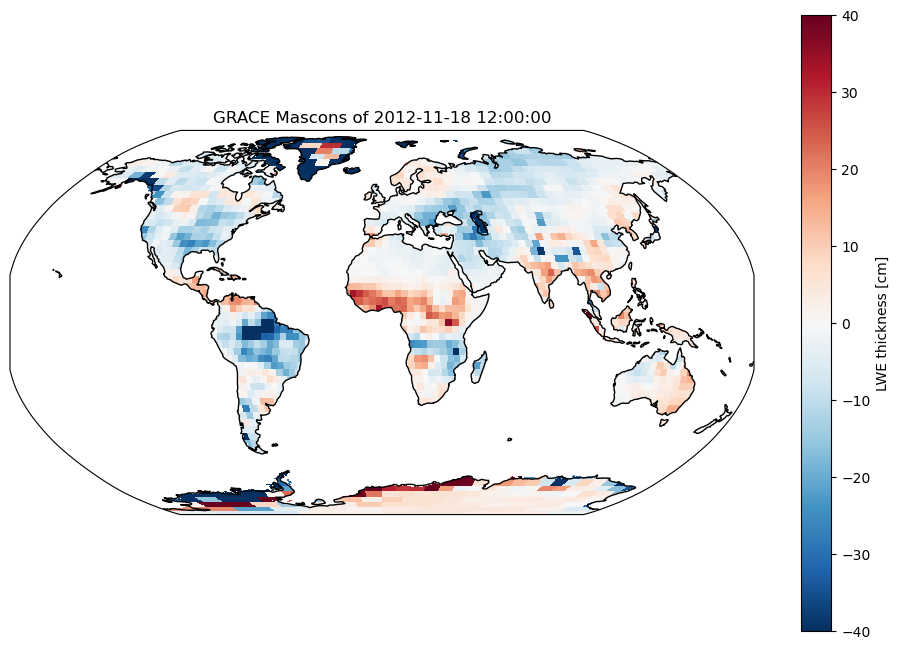

The date which is closest to 2012-12-01 is 2012-11-18 12:00:00


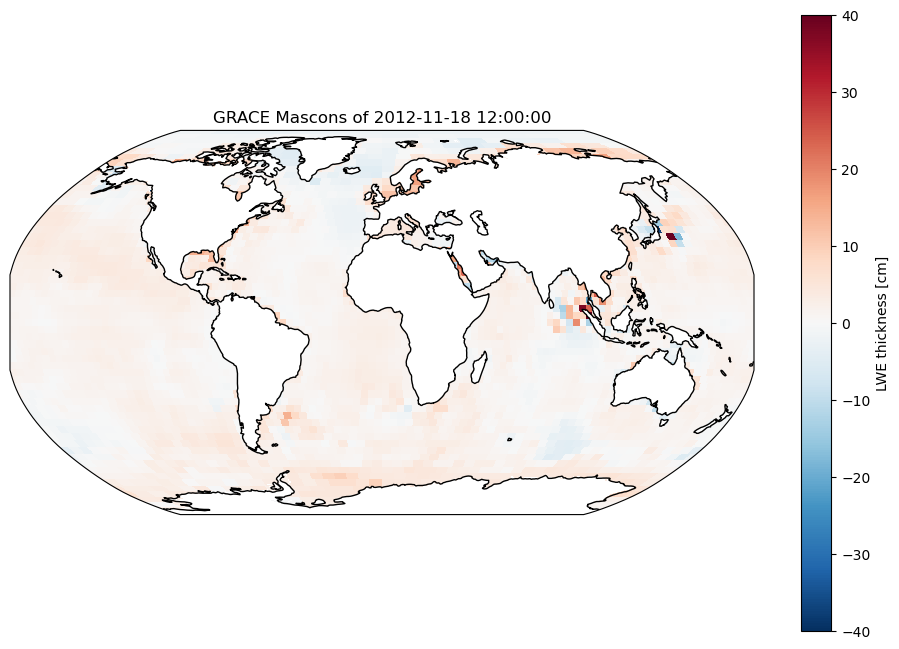

In [33]:
#make an ocen mask
ocean_mask = mascons['land_mask'][:]
ocean_mask = np.where(ocean_mask == 0, 1, np.nan)
land_mask = mascons['land_mask'][:]
land_mask = np.where(land_mask == 1, 1, np.nan)

# Plot the lwet data for the land only
data_land_masked, date_of_data = time_mask_data(land_mask * mascons['lwe_thickness'], '2012-12-01')
plot_mascon_map(data_land_masked, date_of_data)
plt.show()

data_ocean_masked, date_of_data = time_mask_data(ocean_mask * mascons['lwe_thickness'], '2012-12-01')
plot_mascon_map(data_ocean_masked, date_of_data)
plt.show()



_____

(h-plot-region)=
# 3. Select an area of the map and plot a specific region

:::{tip} _Exercise 6:_ Zoom in on a specific region
Can you zoom in on a region and show land-ocean mascons, which have been treated with the CRI filter, in more detail? I.e. create a new plot where you cut out only a part of the global map.
Does it still make sense to use a map projection for your region? Please take a minute and reflect on the resolution of your data and the CRI filter. 

&#9989; Group Task:
: In your team of two, please choose two different regions and compare them in your discussion when reflecting on the CRI filter and the resolution.
:::

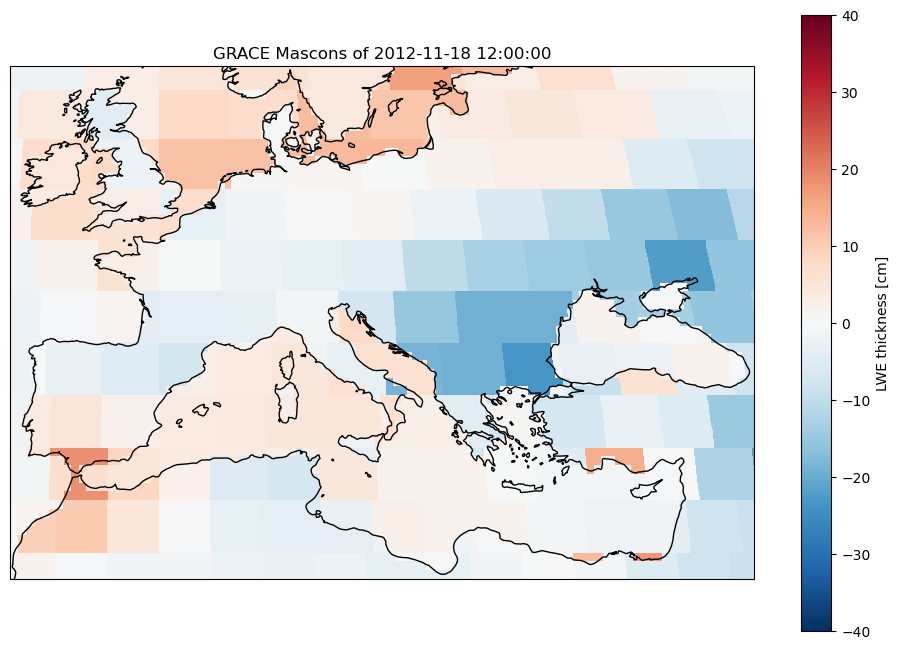

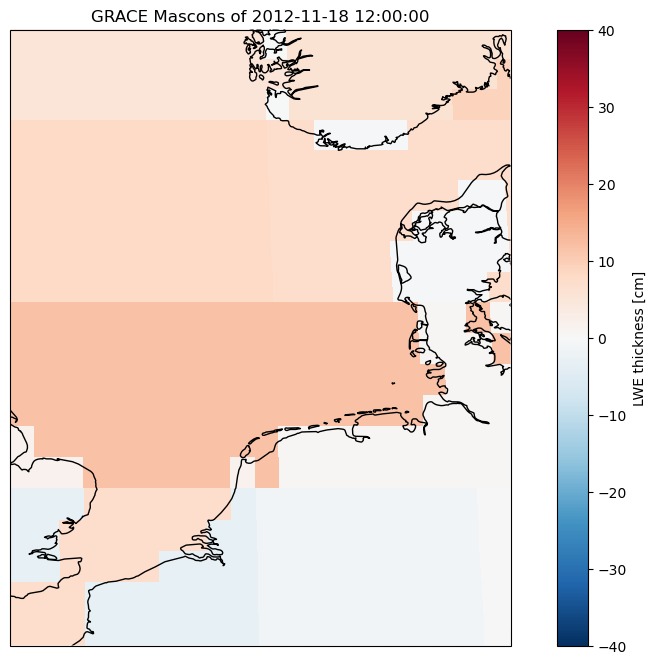

In [20]:
plot_mascon_map(data_masked, date_of_data, lat_min=30, lat_max=60, lon_min=-10, lon_max=40)

plot_mascon_map(data_masked, date_of_data, lat_min=50, lat_max=60, lon_min=0, lon_max=10)
plt.show()

The CRI Filter resolution becomes visible when plotting only smaller areas. The resolution should be the 0.5° mentioned above. For a global model that is quite good. However if very detailed analyses are required one should perform additional measurements.

_____

(h-plot-time-series)=
# 4. Plot the time series of mean values of the gravity fields

:::{tip} _Exercise 7:_ Plot the time series of the GRACE and GRACE-FO data
Let's look at the temporal component of our data: Please choose either a region or the entire map and compute the mean value for each month where there is data available. Then please plot the resulting time series and take into account the missing months appropriately. A bit more information about reasons for missing months can be found [**here**](https://grace.jpl.nasa.gov/data/grace-months/). You can use Jupyternaut again to help you put appropriate labels on the time axis, e.g. month and year. 

&#9989; Group Task:
: In your team of two, pease choose different areas over which you average. Please compare your plots.
- What is similar, what is different?
- What can you see in your time series?
:::

In [34]:
#function to calculate the mean values for a specific region
def calculate_regional_mean(lwe_data, lat_min=None, lat_max=None, lon_min=None, lon_max=None):
    """
    Calculate the mean of the land water equivalent thickness for a specific region.

    Parameters:
    -----------
    lwe_data : array-like
        Land water equivalent thickness data
    lat_min, lat_max : float, optional
        Latitude bounds for filtering
    lon_min, lon_max : float, optional
        Longitude bounds for filtering

    Returns:
    --------
    mean_values : array-like
        Mean values for the region over the whole time given in the data
    """
    # Get lat/lon arrays
    lats = mascons['lat'][:]
    lons = mascons['lon'][:]
    
    # Create masks for lat/lon filtering
    lat_mask = np.ones_like(lats, dtype=bool)
    lon_mask = np.ones_like(lons, dtype=bool)
    
    # Handle latitude mask (normal range -90 to 90)
    if lat_min is not None and lat_max is not None:
        lat_mask = (lats >= lat_min) & (lats <= lat_max)
    
    # Handle longitude mask (considering the 0/360 boundary)
    if lon_min is not None and lon_max is not None:
        # Normalize longitudes to 0-360 range
        lon_min_norm = lon_min % 360
        lon_max_norm = lon_max % 360
        
        # Check if region crosses the 0/360 boundary
        if lon_min_norm > lon_max_norm:
            # Region crosses the boundary (e.g., 350 to 40)
            lon_mask = (lons >= lon_min_norm) | (lons <= lon_max_norm)
        else:
            # Normal case (e.g., 20 to 60)
            lon_mask = (lons >= lon_min_norm) & (lons <= lon_max_norm)
    
    # Create 2D mask from lat/lon masks
    mask = np.outer(lat_mask, lon_mask)
    
    # Apply mask and calculate mean
    masked_data = np.where(mask, lwe_data, np.nan)
    return np.nanmean(masked_data, axis=(1,2))


#function to plot the areas on a map
def plot_areas_on_map(dataframe: pd.DataFrame, title: str) -> None:
    """ Takes a dataframe with the structure ['Region', 'Lat_min', 'Lat_max', 'Lon_min', 'Lon_max'] and plots the regions on a map."""
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    ax.set_global()

    color = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    for i, row in dataframe.iterrows():
        ax.add_patch(plt.Rectangle((row['lon_min'], row['lat_min']), row['lon_max'] - row['lon_min'], row['lat_max'] - row['lat_min'],
                                   facecolor=color[i], alpha=0.5, transform=ccrs.PlateCarree()))
        ax.text(row['lon_min'], row['lat_min'], row['name'], transform=ccrs.PlateCarree())
    
    plt.title(title)
    plt.show()
    

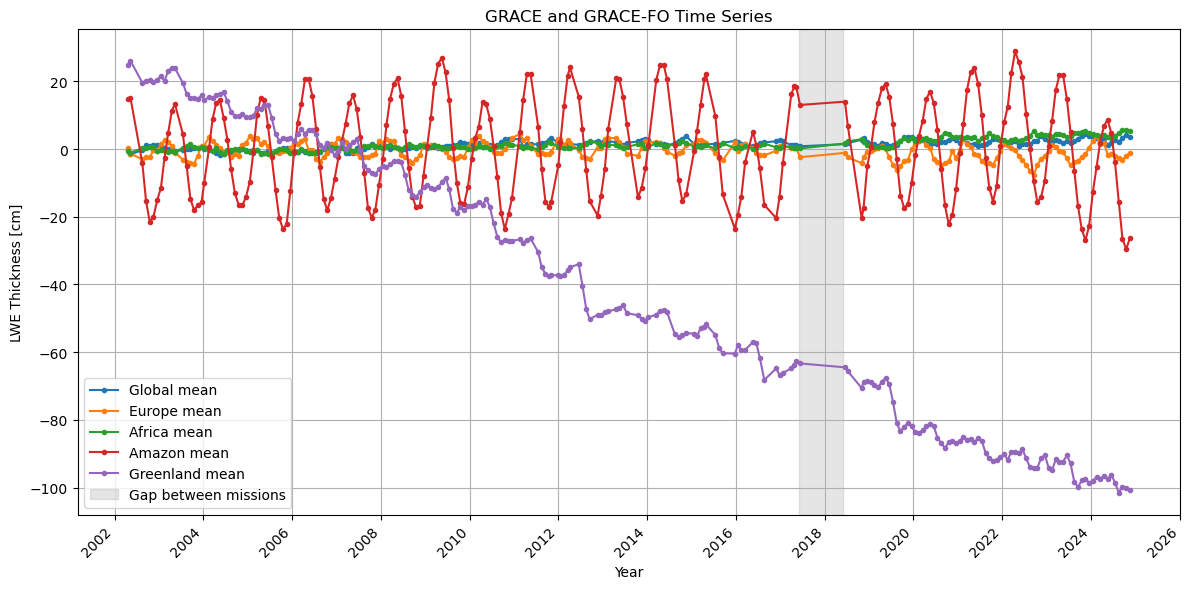

In [40]:
# Get time data and convert to dates
time = mascons['time'][:]
dates = Convert_2002_2_DMJ(time)



# Calculate mean values for different regions
lwe_data = mascons['lwe_thickness'][:]
# Define regions in a DataFrame
regions_df = pd.DataFrame({
    'name': ['Global', 'Europe', 'Africa', 'Amazon', 'Greenland'],
    'lat_min': [-90, 35, -35, -15, 60],
    'lat_max': [90, 70, 35, 5, 85],
    'lon_min': [0, -10, -20, -75, -60],
    'lon_max': [379.99, 30, 55, -45, -20]
})

# Calculate mean values for each region
mean_values = {}
for _, region in regions_df.iterrows():
    mean_values[region['name']] = calculate_regional_mean(
        lwe_data,
        lat_min=region['lat_min'],
        lat_max=region['lat_max'],
        lon_min=region['lon_min'],
        lon_max=region['lon_max']
    )
    # print(f"Mean values for {region['name']}: {mean_values[region['name']]}")


# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot time series for each region
for region, data in mean_values.items():
    ax.plot(dates, data, '.-', label=f'{region} mean')

# Add grey zone between GRACE and GRACE-FO missions
grace_end = datetime(2017, 6, 1)  # End of GRACE mission
gracefo_start = datetime(2018, 6, 1)  # Start of GRACE-FO mission
ax.axvspan(grace_end, gracefo_start, color='grey', alpha=0.2, label='Gap between missions')


# Format x-axis to show years nicely
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('LWE Thickness [cm]')
ax.set_title('GRACE and GRACE-FO Time Series')
ax.grid(True)

# Add legend
ax.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()



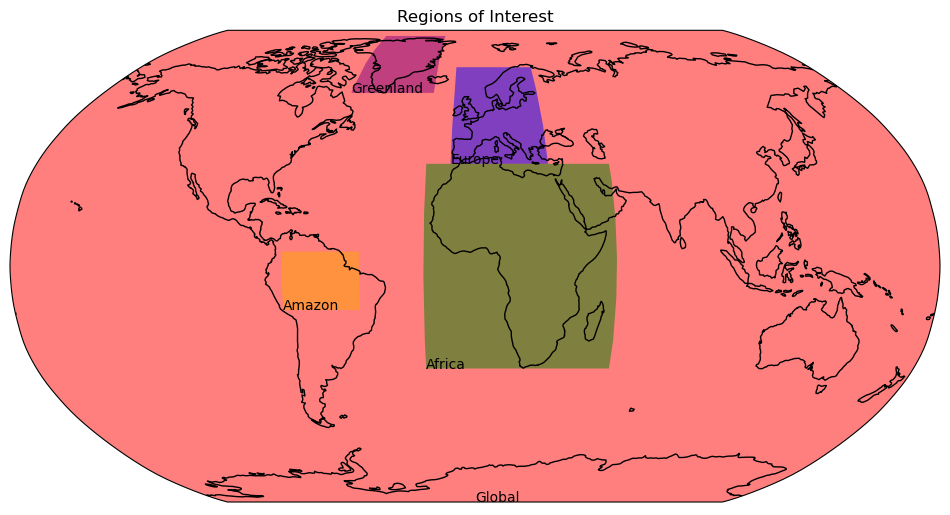

In [30]:
plot_areas_on_map(regions_df, 'Regions of Interest')

### What we can see:

The continents are quite similar to each other. The most interesting effects can be seen in the Amazon and in polar areas. While in the Amazon the annual signal dominates from the rain/humid season in the polar regions one can see the extreme decrease of the ice shields.


_____

(h-outlook-feedback)=
# 5. Outlook and feedback

&#9989; Task:
: Finally, I'd really appreciate your feedback on this JupyterNotebook homework

In [24]:
from IPython.display import IFrame
IFrame('https://docs.google.com/forms/d/e/1FAIpQLSdR1LBx48zuHvNcwvtfCnp6wvJCMFs4clznku0hTKFc2XLtTQ/viewform?embedded=true', 640, 1657)